<a href="https://colab.research.google.com/github/surabhiwaingankar/hospital_los/blob/main/LOS_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
data_full = pd.read_csv('mimic3d.csv')

In [4]:
print(data_full.shape)
data_full.info()
data_full.describe()

(58976, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hadm_id           58976 non-null  int64  
 1   gender            58976 non-null  object 
 2   age               58976 non-null  int64  
 3   LOSdays           58976 non-null  float64
 4   admit_type        58976 non-null  object 
 5   admit_location    58976 non-null  object 
 6   AdmitDiagnosis    58951 non-null  object 
 7   insurance         58976 non-null  object 
 8   religion          58518 non-null  object 
 9   marital_status    48848 non-null  object 
 10  ethnicity         58976 non-null  object 
 11  NumCallouts       58976 non-null  float64
 12  NumDiagnosis      58976 non-null  float64
 13  NumProcs          58976 non-null  float64
 14  AdmitProcedure    58976 non-null  object 
 15  NumCPTevents      58976 non-null  float64
 16  NumInput          58976 non-

,hadm_id,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,149970.809584,53.005884,10.114955,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,1.360248
std,28883.095213,26.028120,12.456231,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,100001.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124952.750000,43.000000,3.710000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,0.000000
50%,149989.500000,59.000000,6.460000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,1.000000
75%,174966.500000,73.000000,11.790000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,2.000000
max,199999.000000,89.000000,294.630000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,3.000000


In [5]:
data_full.head(10)

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1
5,100010,F,54,4.38,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,Private,EPISCOPALIAN,MARRIED,...,0.00,0.11,7.99,9.13,1.14,0.91,448.63,0,509.00,1
6,100011,M,21,14.38,EMERGENCY,CLINIC REFERRAL/PREMATURE,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,Medicaid,NOT SPECIFIED,SINGLE,...,1.88,0.21,18.01,9.94,4.10,0.21,1337.13,0,1482.53,3
7,100012,M,67,10.08,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,...,0.30,0.15,15.48,14.48,2.28,0.60,524.11,0,618.11,2
8,100014,F,49,0.63,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RIGHT SHOULDER ADHESIVE CAPSULITIS/SDA,Medicaid,CATHOLIC,SINGLE,...,0.00,0.00,0.00,0.00,0.00,4.76,0.00,0,25.39,0
9,100016,M,55,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,PNEUMONIA,Medicare,PROTESTANT QUAKER,SINGLE,...,0.81,0.21,16.53,10.05,1.13,0.49,1221.39,0,1315.92,1


In [6]:
y = data_full['LOSgroupNum']
X = data_full.drop('LOSgroupNum', 1)
X = X.drop('LOSdays', 1)
X = X.drop('ExpiredHospital', 1)
X = X.drop('AdmitDiagnosis', 1)
X = X.drop('AdmitProcedure', 1)
X = X.drop('marital_status', 1)
X = X.drop('ethnicity', 1)
X = X.drop('religion', 1)
X = X.drop('insurance', 1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (58976,)
X - No Label No id  (58976, 19)
Index(['hadm_id', 'gender', 'age', 'admit_type', 'admit_location',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract'],
      dtype='object')


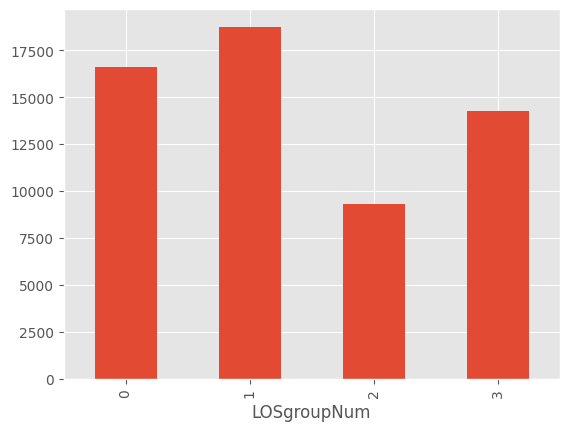

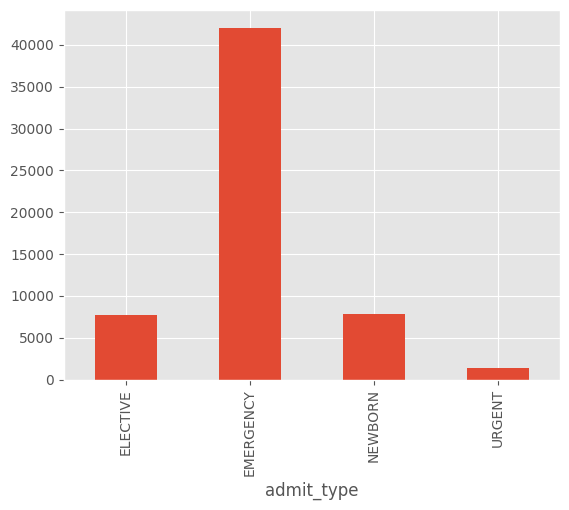

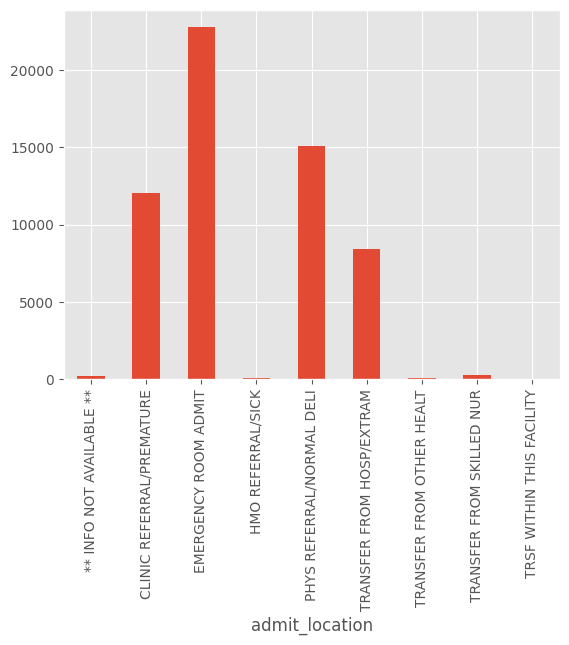

In [7]:
data_full.groupby('LOSgroupNum').size().plot.bar()
plt.show()
data_full.groupby('admit_type').size().plot.bar()
plt.show()
data_full.groupby('admit_location').size().plot.bar()
plt.show()

In [8]:
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hadm_id           58976 non-null  int64  
 1   gender            58976 non-null  object 
 2   age               58976 non-null  int64  
 3   admit_type        58976 non-null  object 
 4   admit_location    58976 non-null  object 
 5   NumCallouts       58976 non-null  float64
 6   NumDiagnosis      58976 non-null  float64
 7   NumProcs          58976 non-null  float64
 8   NumCPTevents      58976 non-null  float64
 9   NumInput          58976 non-null  float64
 10  NumLabs           58976 non-null  float64
 11  NumMicroLabs      58976 non-null  float64
 12  NumNotes          58976 non-null  float64
 13  NumOutput         58976 non-null  float64
 14  NumRx             58976 non-null  float64
 15  NumProcEvents     58976 non-null  float64
 16  NumTransfers      58976 non-null  float6

,hadm_id,age,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract
count,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,149970.809584,53.005884,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,636.115579
std,28883.095213,26.028120,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,783.938087
min,100001.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124952.750000,43.000000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,267.407500
50%,149989.500000,59.000000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,497.335000
75%,174966.500000,73.000000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,811.382500
max,199999.000000,89.000000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,68600.000000


In [9]:
from sklearn.preprocessing import OneHotEncoder
import joblib
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['gender', 'admit_type', 'admit_location']

# Initialize OneHotEncoder

# Create a dictionary to store fitted encoders
encoders = {}

# Identify categorical columns and apply one-hot encoding
for col in categorical_columns:
    if col in X.columns:
        # Reshape the data to have a single feature column for the encoder
        one_hot_encoder = OneHotEncoder(drop='first')
        # Fit and transform the 'Color' column
        encoded_data = one_hot_encoder.fit_transform(X[[col]])


        # Create a DataFrame with the one-hot encoded columns
        encoded_df = pd.DataFrame(encoded_data.toarray(), columns=one_hot_encoder.get_feature_names_out([col]))

        # Drop the original column and concatenate the new DataFrame
        X = X.drop(col, axis=1)
        # Concatenate the original DataFrame with the encoded DataFrame
        X = pd.concat([X, encoded_df], axis=1)


        # Save the fitted encoder to the dictionary
        encoders[col] = one_hot_encoder

print(X.shape)

# Pickle the fitted encoders
for col, encoder in encoders.items():
    joblib.dump(encoder, f'{col}_encoder.joblib')


(58976, 28)


In [10]:
print(data_full.shape)
print(X.shape)
#XnotNorm = np.array(X.copy())
XnotNorm = X.copy()
print('XnotNorm ', XnotNorm.shape)

ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

(58976, 28)
(58976, 28)
XnotNorm  (58976, 28)
ynotNorm  (58976,)


In [11]:
X

,hadm_id,age,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,...,admit_type_NEWBORN,admit_type_URGENT,admit_location_CLINIC REFERRAL/PREMATURE,admit_location_EMERGENCY ROOM ADMIT,admit_location_HMO REFERRAL/SICK,admit_location_PHYS REFERRAL/NORMAL DELI,admit_location_TRANSFER FROM HOSP/EXTRAM,admit_location_TRANSFER FROM OTHER HEALT,admit_location_TRANSFER FROM SKILLED NUR,admit_location_TRSF WITHIN THIS FACILITY
0,100001,35,0.16,2.59,0.00,1.30,25.12,43.44,0.65,0.05,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,59,0.25,2.23,0.99,1.98,13.61,55.94,1.24,1.59,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100006,48,0.00,0.75,0.17,0.83,11.46,33.39,0.33,0.15,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100007,73,0.41,0.69,0.27,0.69,20.30,32.24,0.69,0.17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100009,60,0.00,3.69,0.82,2.25,20.49,50.61,0.61,0.34,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,60,0.00,0.37,0.53,0.94,330.92,66.56,0.20,0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58972,199994,58,0.00,0.92,0.41,0.62,95.18,53.03,2.26,0.30,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
58973,199995,23,0.00,0.60,0.54,0.06,12.66,27.28,0.54,0.10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58974,199998,69,0.00,2.72,0.51,0.17,25.85,49.83,0.17,0.35,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
#print(XNorm)
#print(y)
print('X normalized')

X normalized


In [13]:
x_scaled

array([[-1.73008581, -0.69179166,  0.37094948, ..., -0.03471787,
        -0.06819479, -0.00920801],
       [-1.73001657,  0.23029581,  0.92162658, ..., -0.03471787,
        -0.06819479, -0.00920801],
       [-1.7299127 , -0.19232761, -0.60803204, ..., -0.03471787,
        -0.06819479, -0.00920801],
       ...,
       [ 1.73196862, -1.15283539, -0.60803204, ..., -0.03471787,
        -0.06819479, -0.00920801],
       [ 1.73207249,  0.61449892, -0.60803204, ..., -0.03471787,
        -0.06819479, -0.00920801],
       [ 1.73210711,  1.34448483, -0.60803204, ..., -0.03471787,
        -0.06819479, -0.00920801]])

In [14]:
joblib.dump(scaler, 'X_scaled.joblib')

['X_scaled.joblib']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=7)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (47180, 28)
X_test:  (11796, 28)
y_train:  (47180,)
y_test:  (11796,)


In [16]:
seed = 42
scoring = 'accuracy'

# Spot Check Algorithms
Mymodels = []
#Mymodels.append(('LogReg', LogisticRegression()))
Mymodels.append(('RandomForestClassifier', RandomForestClassifier()))
Mymodels.append(('SGDclassifier', SGDClassifier()))
#Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))
Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
#Mymodels.append(('GaussianNB', GaussianNB()))
#Mymodels.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RandomForestClassifier: 0.905680 (0.004984)
SGDclassifier: 0.658987 (0.012906)
DecisionTreeClassifier: 0.864434 (0.004631)


In [17]:
model = RandomForestClassifier()

param_grid = [{},]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

RandomForestClassifier()


In [18]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

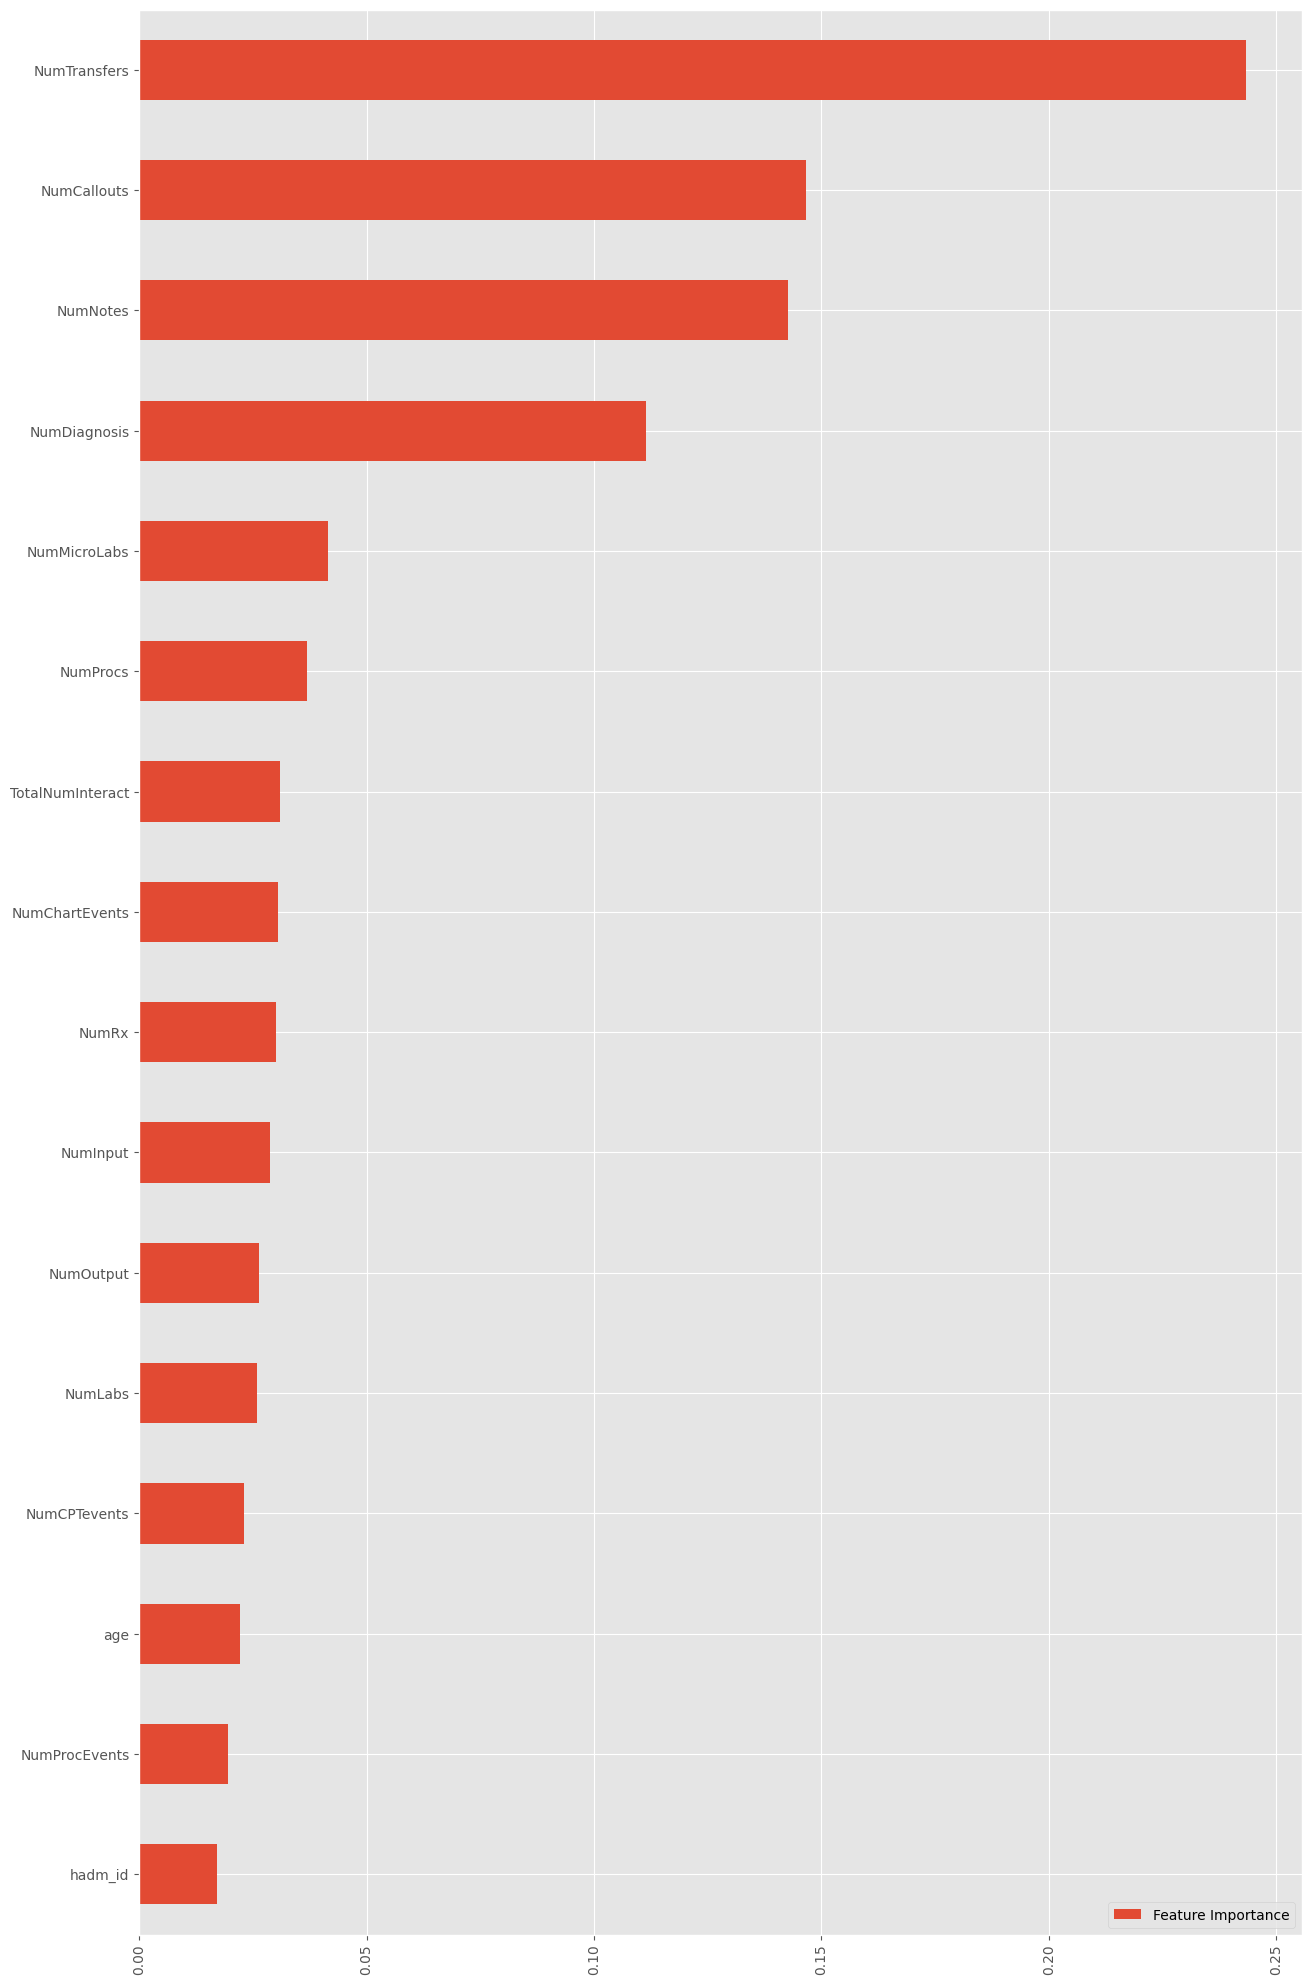

In [19]:
# Assuming 'model' is a RandomForestClassifier instance
trainFinalFI = XNorm
yFinalFI = y

model = RandomForestClassifier(max_features='sqrt')
model.fit(trainFinalFI, yFinalFI)

FI_model = pd.DataFrame({"Feature Importance": model.feature_importances_}, index=trainFinalFI.columns)
selected_features = FI_model[FI_model["Feature Importance"] > 0.005]


selected_features.sort_values("Feature Importance").plot(kind="barh", figsize=(15, 25))
plt.xticks(rotation=90)
plt.show()



In [20]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1-np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1-np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [21]:
# Split into Train & Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (47180, 28)
X_test:  (11796, 28)
y_train:  (47180,)
y_test:  (11796,)


In [22]:
# Model FINAL fit and evaluation on test
model.fit(X_train, y_train)
final_predictions = model.predict(X_test)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)
print('conf_mx ready')

conf_mx ready


In [23]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [24]:
def plot_confusion_matrix(cm,target_names,title='Confusion Matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


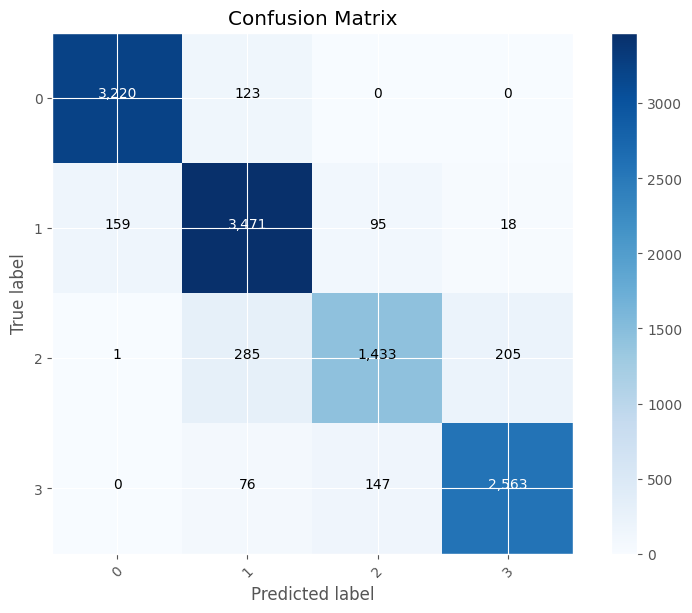

In [25]:
plot_confusion_matrix(conf_mx,
                      normalize    = False,
                      target_names = [0,1,2,3],
                      title        = "Confusion Matrix")

Class  0


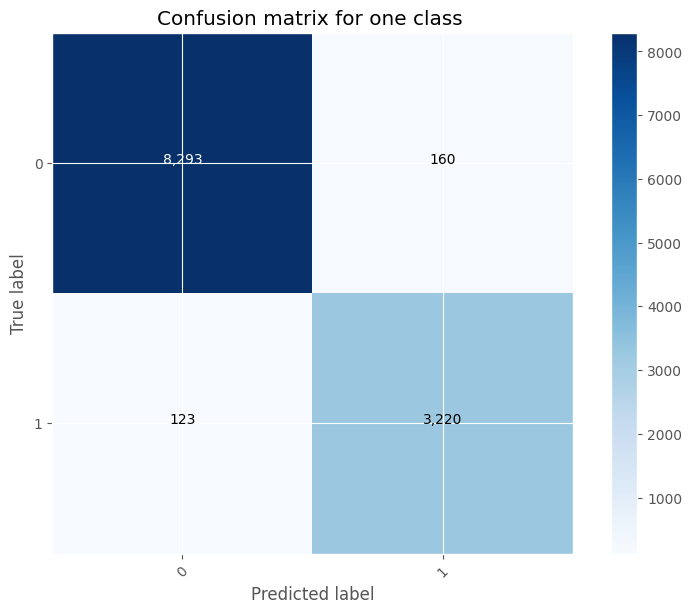

TPz  3220
FNz  123
FPz  160
TNz  8293
sum  11796
[[8293  160]
 [ 123 3220]]
Sum of CM  11796
accuracy  0.976
recall  0.9632
precision  0.9527
F1Score  0.9579
----------------------------------------
Class  1


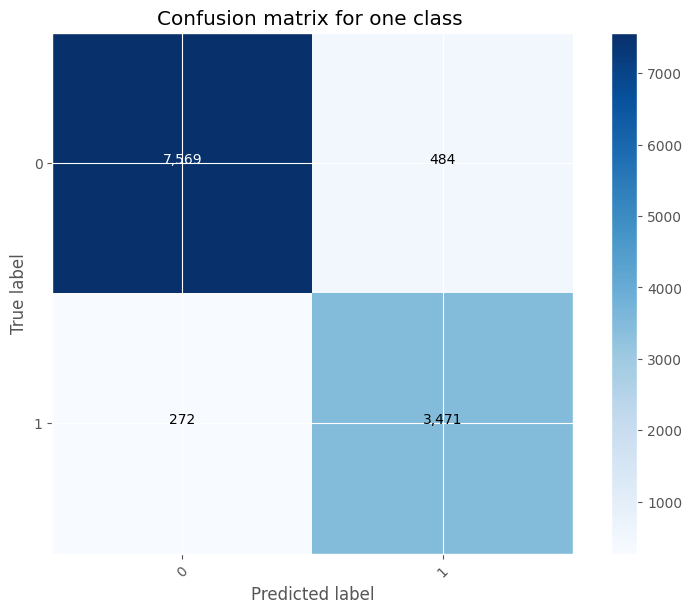

TPz  3471
FNz  272
FPz  484
TNz  7569
sum  11796
[[7569  484]
 [ 272 3471]]
Sum of CM  11796
accuracy  0.9359
recall  0.9273
precision  0.8776
F1Score  0.9018
----------------------------------------
Class  2


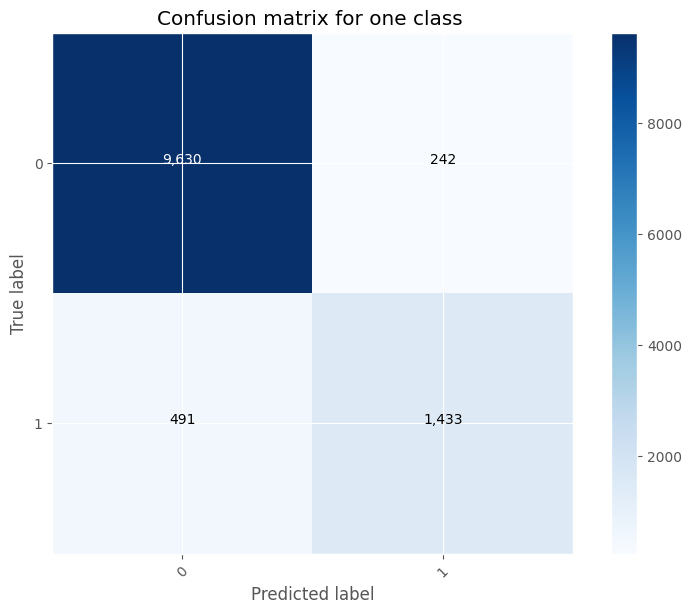

TPz  1433
FNz  491
FPz  242
TNz  9630
sum  11796
[[9630  242]
 [ 491 1433]]
Sum of CM  11796
accuracy  0.9379
recall  0.7448
precision  0.8555
F1Score  0.7963
----------------------------------------
Class  3


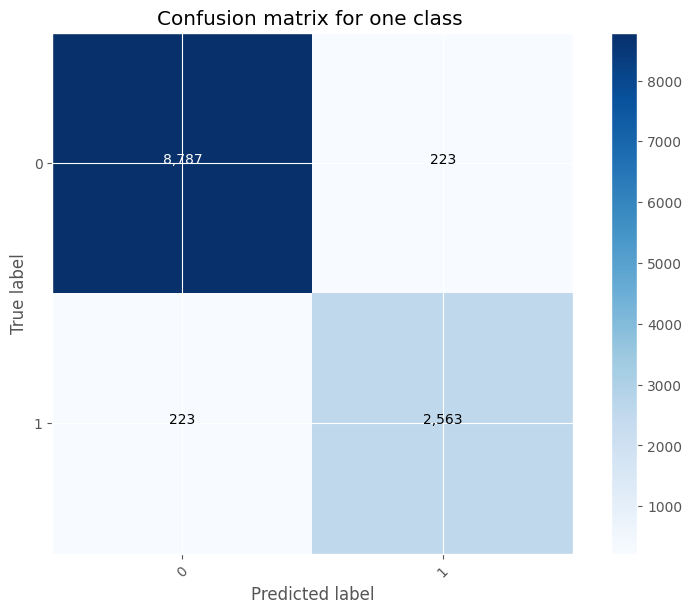

TPz  2563
FNz  223
FPz  223
TNz  8787
sum  11796
[[8787  223]
 [ 223 2563]]
Sum of CM  11796
accuracy  0.9622
recall  0.92
precision  0.92
F1Score  0.92
----------------------------------------
TN:  34279
FP:  1109
FN:  1109
TP:  10687
________________________________________


In [26]:
# Confusion matrix and all metrics - for EACH class separately

NumClasses = 4

TP = 0
TN = 0
FP = 0
FN = 0

for z in range(NumClasses):
# One class at a time - calculate confusion matrix
    SumCM = np.sum(conf_mx)
    TPz = conf_mx[z,z]
    FNz = np.sum(conf_mx[z,:], axis=0) -TPz
    FPz = np.sum(conf_mx[:,z], axis=0) -TPz
    TNz = SumCM - (TPz+FNz+FPz)
    #FPz = np.sum(conf_mx[z], axis=-1)
    #FPz = sum(conf_mx(:, z))-conf_mx(z, z)
    #FNz = sum(conf_mx(x, :), 2)-conf_mx(x, x)
    print('Class ',z)


    # Create conf matrix for class z
    cmZ = np.zeros([2, 2], dtype=np.int32)
    cmZ[0,0] = TNz
    cmZ[0,1] = FPz
    cmZ[1,0] = FNz
    cmZ[1,1] = TPz

    plot_confusion_matrix(cmZ,
                          normalize    = False,
                          target_names = [0,1],
                          title        = "Confusion matrix for one class ")

    accuracy = (TPz+TNz)/(TPz+TNz+FPz+FNz)
    recall = TPz/(TPz+FNz)
    precision = TPz/(TPz+FPz)
    f1score = 2*recall*precision/(recall+precision)
    #roc_auc = auc(FPz, TPz)

    print('TPz ',TPz)
    print('FNz ',FNz)
    print('FPz ',FPz)
    print('TNz ',TNz)
    print('sum ', TPz+TNz+FPz+FNz)
    print(cmZ)
    print('Sum of CM ', np.sum(cmZ))
    print ('accuracy ',round(accuracy,4))
    print('recall ', round(recall,4))
    print('precision ', round(precision,4))
    print('F1Score ', round(f1score,4))
    print('-'*40)

    TP = TP + TPz
    TN = TN + TNz
    FP = FP + FPz
    FN = FN + FNz
print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)
print('_'*40)

Confusion Matix for ALL Classes


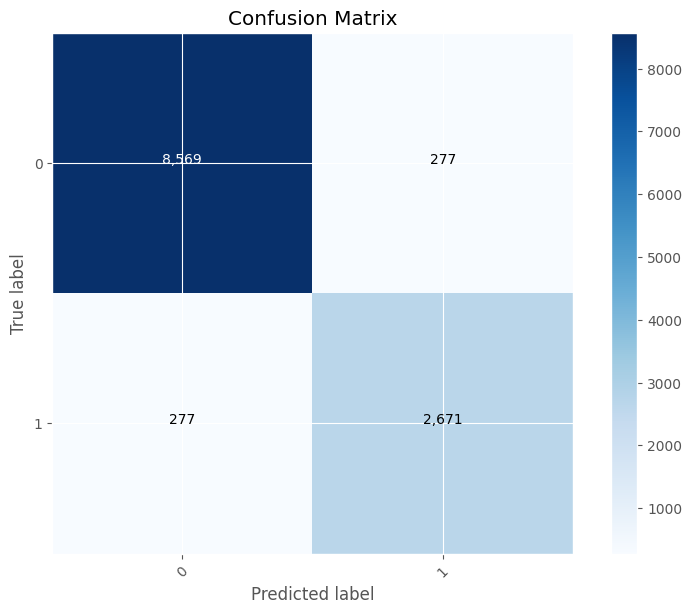

In [27]:
# Confusion Matrix for the WHOLE MODEL - ALL Classes

print('Confusion Matix for ALL Classes')

TP = TP / NumClasses
TN = TN / NumClasses
FP = FP / NumClasses
FN = FN / NumClasses


cm = np.zeros([2, 2], dtype=np.int32)
cm[0,0] = TN
cm[0,1] = FP
cm[1,0] = FN
cm[1,1] = TP

plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names = [0,1],
                      title        = "Confusion Matrix")


In [28]:
def multiclass_roc_auc_score(y_test, final_predictions, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(final_predictions)

    return roc_auc_score(y_test, y_pred, average=average)

print('AUC ROC ',multiclass_roc_auc_score(y_test, final_predictions))

AUC ROC  0.9283753837971922


In [29]:
import joblib

# Save model
joblib.dump(model, 'model.joblib')

['model.joblib']